# TAREFA 6 - Algoritmo Genético

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>
    
Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
    <li>numpy </li>
    <li>random </li>
    <li>matplotlib - para criação dos gráficos </li>
</ul>

In [144]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [145]:
def plota_grafico (resultado_calculado, erro_ajuste, epoca):
    plt.title(f"Curva estimada inicial x curva da função x^2 -- Época: {epoca}") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis")
    x = np.arange(-5, 5, 0.1)
    y = x**2
    
    plt.plot(x,y, 'r')
    plt.plot(x, resultado_calculado, 'b')
    plt.legend(["Função x^2", "Curva estimada ajustada"])
    plt.text(-1, 15, f"Erro: {erro_ajuste}")
    plt.show()

In [146]:
# Modelo Fuzzy TSK - sistema de inferência de Sugeno

def tsk (max_epocas):
    num_ajustes = 1
    alpha = 0.01
    x=[]
    erro_ajuste=[]

    # preenche x
    x = np.arange(-5, 5, 0.1)
    x = x.tolist()

    e = 0

    # minimizar o erro de cada um dos parâmetros caminhar na direção contrária do gradiente
    p1 = -2
    q1 = 0
    x1_medio = -2
    sigma1 = 1

    p2= 2
    q2= 0
    x2_medio = 2
    sigma2 = 1

    for i in range(max_epocas):
        aux_x = []
        aux_x.extend(x)

        for j in range(len(x)):
            # ajuste dos parametros
            for ajuste in range(num_ajustes):
                xi = random.choice(aux_x)
                aux_x.remove(xi)
                w1 = np.exp(-(1/2)*((xi-x1_medio)/sigma1)**2)
                w2 = np.exp(-(1/2)*((xi-x2_medio)/sigma2)**2)

                w1_derivada = w1 / (w1 + w2)
                w2_derivada = w2 / (w1 + w2)

                y1 = p1*xi + q1
                y2 = p2*xi + q2

                y = ((w1*y1) + (w2*y2))/(w1 + w2)

                yd = xi**2

                e = y - yd

                # Derivadas parciais da função erro em relação a cada um dos parâmetros
                dedp1 = e*w1_derivada*xi
                dedp2 = e*w2_derivada*xi
                dedq1 = e*w1_derivada
                dedq2 = e*w2_derivada

                dedx1_medio = e*w2*((y1-y2)/((w1+w2)**2))*w1*((xi-x1_medio)/(sigma1**2))
                dedx2_medio = e*w2*((y2-y1)/((w1+w2)**2))*w1*((xi-x2_medio)/(sigma2**2))

                dedsigma1 = e*w2*((y1-y2)/((w1+w2)**2))*w1*(((xi-x1_medio)**2)/(sigma1**3))
                dedsigma2 = e*w2*((y2-y1)/((w1+w2)**2))*w1*(((xi-x2_medio)**2)/(sigma2**3))

                # Ajustes
                p1 = p1 - alpha*dedp1
                p2 = p2 - alpha*dedp2
                q1 = q1 - alpha*dedq1
                q2 = q2 - alpha*dedq2
                sigma1 = sigma1 - alpha*dedsigma1
                sigma2 = sigma2 - alpha*dedsigma2
                x1_medio = x1_medio - alpha*dedx1_medio
                x2_medio = x2_medio - alpha*dedx2_medio

        erro_ajuste.append(1/2*(e**2))

    # Resultado final
    resultado_calculado = []

    for xi in x:
        w1 = np.exp(-(1/2)*((xi-x1_medio)/sigma1)**2)
        w2 = np.exp(-(1/2)*((xi-x2_medio)/sigma2)**2)

        y1 = p1*xi + q1
        y2 = p2*xi + q2

        y = ((w1*y1) + (w2*y2))/(w1 + w2)
        resultado_calculado.append(y)

    plota_grafico(resultado_calculado, "%.5f" % round(np.mean(erro_ajuste),5), max_epocas)


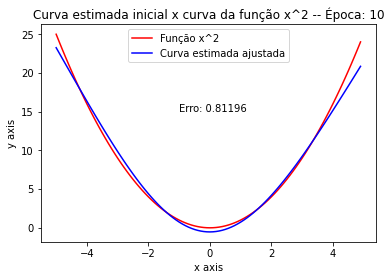

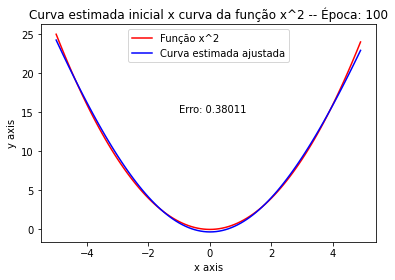

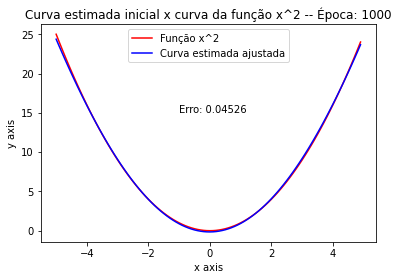

In [147]:
epocas = [10, 100, 1000]
for epoca in epocas:
    tsk(epoca)

<h2>Resultados</h2>

<p>
    Para avaliarmos o desempenho do modelo de Sugeno, executamos para diferentes quantidades de épocas.
    Apesar de não ser o mesmo conjunto de valores, pode-se observar que o erro médio quadrático tende a diminuir conforme aumenta a quantidade de épocas.
</p>